# Práctica de Laboratorio de Procesamiento del Lenguaje Natural (NLP)

Tema: Clustering Jerárquico

## Objetivo de la práctica

El objetivo de esta práctica es procesar los datos de entrada dados en el "corpus", con el objetivo de ejecutar clustering jerárquico (utilizando `AgglomerativeClustering`) para comprobar los resultados.

In [ ]:
!pip install matplotlib

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt

pd.options.display.max_colwidth = 200
%matplotlib inline

In [2]:
corpus = ['El cielo es azul y luminoso.',
          '¡Me encanta este cielo azul y luminoso!',
          'El zorro marrón es rápido y salta sobre el perro que es dormilón.',
          'Un desayuno real tiene salchichas, jamón, bacon, huevos, tostadas y queso',
          '¡Me encanta el jamón, los huevos, las salchichas y el bacon!',
          '¡El zorro marrón es rápido, y el perro azul es un dormilón!',
          'El cielo es azul intenso y hoy está muy luminoso',
          '¡El perro es un dormilón, pero el zorro es mu rápido!'
]
labels = ['tiempo', 'tiempo', 'animales', 'alimentos', 'alimentos', 'animales', 'tiempo', 'animales']

corpus = np.array(corpus)
corpus_df = pd.DataFrame({'Documento': corpus}) 

corpus_df

,Documento
0,El cielo es azul y luminoso.
1,¡Me encanta este cielo azul y luminoso!
2,El zorro marrón es rápido y salta sobre el perro que es dormilón.
3,"Un desayuno real tiene salchichas, jamón, bacon, huevos, tostadas y queso"
4,"¡Me encanta el jamón, los huevos, las salchichas y el bacon!"
5,"¡El zorro marrón es rápido, y el perro azul es un dormilón!"
6,El cielo es azul intenso y hoy está muy luminoso
7,"¡El perro es un dormilón, pero el zorro es mu rápido!"


# Pre-procesamiento

Para poder clusterizar los textos con mayor facilidad, es necesario que se queden las palabras que contengan significado de cada texto. Por ello, preprocesa los textos para eliminar los caracteres especiales, unificarlo en minúsculas, eliminar espacios extra (utiliza `strip()` para esto) y eliminar las stopwords.

In [6]:
import spacy
import pandas as pd
import re
from nltk.corpus import stopwords

# Descargar las stopwords en español de nltk
import nltk
nltk.download('stopwords')

# Cargar el modelo de lenguaje en español
nlp = spacy.load("es_core_news_sm")


# Función de preprocesamiento
def preprocesar_texto(texto):
    # Eliminar caracteres especiales y convertir a minúsculas
    texto = re.sub(r'[^a-zA-Z\s]', '', texto)
    texto = texto.lower()
    
    # Eliminar espacios extra
    texto = texto.strip()
    
    # Tokenizar y eliminar stopwords con spaCy
    doc = nlp(texto)
    tokens_sin_stopwords = [token.text for token in doc if not token.is_stop]
    
    # Unir los tokens procesados en un solo texto
    texto_procesado = ' '.join(tokens_sin_stopwords)
    
    return texto_procesado

# Aplicar preprocesamiento a cada noticia en el DataFrame
corpus_df['contenido_procesado'] = corpus_df['Documento'].apply(preprocesar_texto)

# Mostrar los primeros textos preprocesados para verificar
print("Textos preprocesados:")
print(corpus_df['contenido_procesado'].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Textos preprocesados:
0                                          cielo azul luminoso
1                                  encanta cielo azul luminoso
2                        zorro marrn rpido salta perro dormiln
3    desayuno real salchichas jamn bacon huevos tostadas queso
4                         encanta jamn huevos salchichas bacon
Name: contenido_procesado, dtype: object


# Generación de las matrices

Genera BOW, TFIDF & Bag Of N-grams; se utilizarán para comparar los resultados.

In [7]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Función para imprimir las primeras N características de cada representación
def imprimir_primeras_caracteristicas(matrix, feature_names, N=10):
    for i, row in enumerate(matrix):
        print(f"Texto {i + 1}:")
        top_features_idx = row.argsort()[-N:][::-1]
        top_features = [(feature_names[idx], row[idx]) for idx in top_features_idx]
        print(top_features)
        print("="*30)

# Representación Bag of Words (BOW)
vectorizer_bow = CountVectorizer()
bow_matrix = vectorizer_bow.fit_transform(corpus_df['contenido_procesado'])
bow_feature_names = vectorizer_bow.get_feature_names_out()

# Representación TF-IDF
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(corpus_df['contenido_procesado'])
tfidf_feature_names = vectorizer_tfidf.get_feature_names_out()

# Representación Bag of N-grams (unigrams y bigrams)
vectorizer_ngrams = CountVectorizer(ngram_range=(1, 2))
ngrams_matrix = vectorizer_ngrams.fit_transform(corpus_df['contenido_procesado'])
ngrams_feature_names = vectorizer_ngrams.get_feature_names_out()

# Imprimir las primeras características de cada representación
print("BOW:")
imprimir_primeras_caracteristicas(bow_matrix.toarray(), bow_feature_names)

print("\nTF-IDF:")
imprimir_primeras_caracteristicas(tfidf_matrix.toarray(), tfidf_feature_names)

print("\nBag of N-grams:")
imprimir_primeras_caracteristicas(ngrams_matrix.toarray(), ngrams_feature_names)


BOW:
Texto 1:
[('luminoso', 1), ('cielo', 1), ('azul', 1), ('salchichas', 0), ('rpido', 0), ('bacon', 0), ('salta', 0), ('desayuno', 0), ('dormiln', 0), ('encanta', 0)]
Texto 2:
[('luminoso', 1), ('encanta', 1), ('cielo', 1), ('azul', 1), ('rpido', 0), ('huevos', 0), ('bacon', 0), ('salta', 0), ('desayuno', 0), ('dormiln', 0)]
Texto 3:
[('zorro', 1), ('salta', 1), ('rpido', 1), ('perro', 1), ('dormiln', 1), ('marrn', 1), ('huevos', 0), ('bacon', 0), ('cielo', 0), ('desayuno', 0)]
Texto 4:
[('huevos', 1), ('bacon', 1), ('salchichas', 1), ('real', 1), ('queso', 1), ('desayuno', 1), ('tostadas', 1), ('jamn', 1), ('zorro', 0), ('cielo', 0)]
Texto 5:
[('jamn', 1), ('bacon', 1), ('salchichas', 1), ('encanta', 1), ('huevos', 1), ('zorro', 0), ('cielo', 0), ('desayuno', 0), ('dormiln', 0), ('est', 0)]
Texto 6:
[('zorro', 1), ('perro', 1), ('dormiln', 1), ('marrn', 1), ('azul', 1), ('rpido', 1), ('real', 0), ('queso', 0), ('mu', 0), ('salchichas', 0)]
Texto 7:
[('luminoso', 1), ('intenso', 1), 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Función para imprimir las primeras N características de cada representación
def imprimir_primeras_caracteristicas(matrix, feature_names, N=10):
    for i, row in enumerate(matrix):
        print(f"Texto {i + 1}:")
        top_features_idx = row.argsort()[-N:][::-1]
        top_features = [(feature_names[idx], row[idx]) for idx in top_features_idx]
        print(top_features)
        print("="*30)

# Representación Bag of Words (BOW)
vectorizer_bow = CountVectorizer()
bow_matrix = vectorizer_bow.fit_transform(corpus_df['contenido_procesado'])
bow_feature_names = vectorizer_bow.get_feature_names_out()

# Imprimir las primeras características de la representación BOW
print("BOW:")
imprimir_primeras_caracteristicas(bow_matrix.toarray(), bow_feature_names)

BOW:
Texto 1:
[('luminoso', 1), ('cielo', 1), ('azul', 1), ('salchichas', 0), ('rpido', 0), ('bacon', 0), ('salta', 0), ('desayuno', 0), ('dormiln', 0), ('encanta', 0)]
Texto 2:
[('luminoso', 1), ('encanta', 1), ('cielo', 1), ('azul', 1), ('rpido', 0), ('huevos', 0), ('bacon', 0), ('salta', 0), ('desayuno', 0), ('dormiln', 0)]
Texto 3:
[('zorro', 1), ('salta', 1), ('rpido', 1), ('perro', 1), ('dormiln', 1), ('marrn', 1), ('huevos', 0), ('bacon', 0), ('cielo', 0), ('desayuno', 0)]
Texto 4:
[('huevos', 1), ('bacon', 1), ('salchichas', 1), ('real', 1), ('queso', 1), ('desayuno', 1), ('tostadas', 1), ('jamn', 1), ('zorro', 0), ('cielo', 0)]
Texto 5:
[('jamn', 1), ('bacon', 1), ('salchichas', 1), ('encanta', 1), ('huevos', 1), ('zorro', 0), ('cielo', 0), ('desayuno', 0), ('dormiln', 0), ('est', 0)]
Texto 6:
[('zorro', 1), ('perro', 1), ('dormiln', 1), ('marrn', 1), ('azul', 1), ('rpido', 1), ('real', 0), ('queso', 0), ('mu', 0), ('salchichas', 0)]
Texto 7:
[('luminoso', 1), ('intenso', 1), 

# Bag of N-Grams Model

In [11]:

# Representación Bag of N-grams (unigrams y bigrams)
vectorizer_ngrams = CountVectorizer(ngram_range=(1, 2))
ngrams_matrix = vectorizer_ngrams.fit_transform(corpus_df['contenido_procesado'])
ngrams_feature_names = vectorizer_ngrams.get_feature_names_out()

# Imprimir las primeras características de la representación Bag of N-grams
print("Bag of N-grams:")
imprimir_primeras_caracteristicas(ngrams_matrix.toarray(), ngrams_feature_names)

Bag of N-grams:
Texto 1:
[('azul', 1), ('luminoso', 1), ('azul luminoso', 1), ('cielo', 1), ('cielo azul', 1), ('encanta cielo', 0), ('intenso est', 0), ('intenso', 0), ('huevos tostadas', 0), ('huevos salchichas', 0)]
Texto 2:
[('azul', 1), ('luminoso', 1), ('azul luminoso', 1), ('cielo', 1), ('cielo azul', 1), ('encanta', 1), ('encanta cielo', 1), ('encanta jamn', 0), ('intenso est', 0), ('intenso', 0)]
Texto 3:
[('dormiln', 1), ('marrn rpido', 1), ('zorro', 1), ('perro dormiln', 1), ('salta perro', 1), ('salta', 1), ('zorro marrn', 1), ('perro', 1), ('rpido salta', 1), ('marrn', 1)]
Texto 4:
[('real', 1), ('bacon', 1), ('desayuno real', 1), ('desayuno', 1), ('queso', 1), ('huevos tostadas', 1), ('real salchichas', 1), ('salchichas', 1), ('bacon huevos', 1), ('salchichas jamn', 1)]
Texto 5:
[('jamn huevos', 1), ('encanta', 1), ('huevos salchichas', 1), ('bacon', 1), ('huevos', 1), ('salchichas bacon', 1), ('salchichas', 1), ('encanta jamn', 1), ('jamn', 1), ('intenso', 0)]
Texto 6:
[

# TF-IDF Model

In [12]:
# Representación TF-IDF
vectorizer_tfidf = TfidfVectorizer()
tfidf_matrix = vectorizer_tfidf.fit_transform(corpus_df['contenido_procesado'])
tfidf_feature_names = vectorizer_tfidf.get_feature_names_out()

# Imprimir las primeras características de la representación TF-IDF
print("TF-IDF:")
imprimir_primeras_caracteristicas(tfidf_matrix.toarray(), tfidf_feature_names)

TF-IDF:
Texto 1:
[('luminoso', 0.600978201166947), ('cielo', 0.600978201166947), ('azul', 0.5269254249362817), ('salchichas', 0.0), ('rpido', 0.0), ('bacon', 0.0), ('salta', 0.0), ('desayuno', 0.0), ('dormiln', 0.0), ('encanta', 0.0)]
Texto 2:
[('encanta', 0.5715049507369838), ('luminoso', 0.4931618811131931), ('cielo', 0.4931618811131931), ('azul', 0.4323942753054339), ('rpido', 0.0), ('huevos', 0.0), ('bacon', 0.0), ('salta', 0.0), ('desayuno', 0.0), ('dormiln', 0.0)]
Texto 3:
[('salta', 0.5133672553169809), ('marrn', 0.4302418255901423), ('zorro', 0.37126339460050833), ('rpido', 0.37126339460050833), ('perro', 0.37126339460050833), ('dormiln', 0.37126339460050833), ('huevos', 0.0), ('bacon', 0.0), ('cielo', 0.0), ('desayuno', 0.0)]
Texto 4:
[('real', 0.3832149224542694), ('queso', 0.3832149224542694), ('desayuno', 0.3832149224542694), ('tostadas', 0.3832149224542694), ('huevos', 0.3211640129410023), ('bacon', 0.3211640129410023), ('salchichas', 0.3211640129410023), ('jamn', 0.321164

# Similitud entre documentos

Calcula la similitud entre documentos con una de las matrices que has generado. Utiliza `cosine_similarity()`. Con este cálculo, se podrá lanzar un clustering jerárquico que, en función de estas distancias, localizará cada texto en uno de los clusters.

In [19]:
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import AgglomerativeClustering

# Calcular la similitud de coseno entre documentos usando la matriz TF-IDF
similarity_matrix = cosine_similarity(tfidf_matrix)
similarity_matrix




array([[1.        , 0.82059862, 0.        , 0.        , 0.        ,
        0.18687823, 0.64804776, 0.        ],
       [0.82059862, 1.        , 0.        , 0.        , 0.25558478,
        0.15335202, 0.5317871 , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.80238473, 0.        , 0.61076513],
       [0.        , 0.        , 0.        , 1.        , 0.57451565,
        0.        , 0.        , 0.        ],
       [0.        , 0.25558478, 0.        , 0.57451565, 1.        ,
        0.        , 0.        , 0.        ],
       [0.18687823, 0.15335202, 0.80238473, 0.        , 0.        ,
        1.        , 0.12110602, 0.66544357],
       [0.64804776, 0.5317871 , 0.        , 0.        , 0.        ,
        0.12110602, 1.        , 0.        ],
       [0.        , 0.        , 0.61076513, 0.        , 0.        ,
        0.66544357, 0.        , 1.        ]])

# Clustering jerárquico

Utiliza `AgglomerativeClustering()`para calcular a qué cluster pertenecería cada texto. Configura que el número de clusters sea 4.

Representa en un dendograma los clusters jerárquicos obtenidos.

/home/codespace/.local/lib/python3.10/site-packages/sklearn/cluster/_agglomerative.py:1005: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


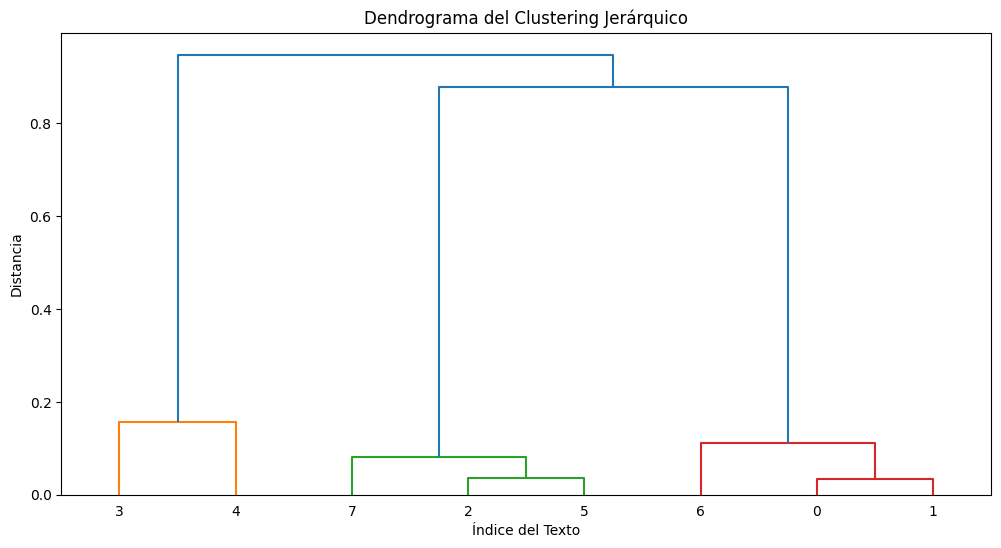

Resultados del Clustering Jerárquico:

Cluster 1:
0                        El cielo es azul y luminoso.
1             ¡Me encanta este cielo azul y luminoso!
6    El cielo es azul intenso y hoy está muy luminoso
Name: Documento, dtype: object

Cluster 2:
4    ¡Me encanta el jamón, los huevos, las salchichas y el bacon!
Name: Documento, dtype: object

Cluster 3:
2    El zorro marrón es rápido y salta sobre el perro que es dormilón.
5          ¡El zorro marrón es rápido, y el perro azul es un dormilón!
7                ¡El perro es un dormilón, pero el zorro es mu rápido!
Name: Documento, dtype: object

Cluster 4:
3    Un desayuno real tiene salchichas, jamón, bacon, huevos, tostadas y queso
Name: Documento, dtype: object


In [18]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Realizar clustering jerárquico
num_clusters = 4
clustering = AgglomerativeClustering(n_clusters=num_clusters, affinity='cosine', linkage='average')
cluster_labels = clustering.fit_predict(similarity_matrix)

# Agregar etiquetas de cluster al DataFrame
corpus_df['cluster'] = cluster_labels

# Calcular las distancias entre los clusters para el dendrograma
distances = linkage(similarity_matrix, method='average', metric='cosine')

# Representar el dendrograma
plt.figure(figsize=(12, 6))
dendrogram(distances, labels=corpus_df.index, orientation='top', leaf_font_size=10)
plt.title('Dendrograma del Clustering Jerárquico')
plt.xlabel('Índice del Texto')
plt.ylabel('Distancia')
plt.show()

# Mostrar resultados
print("Resultados del Clustering Jerárquico:")
for cluster in range(num_clusters):
    print(f"\nCluster {cluster + 1}:")
    print(corpus_df[corpus_df['cluster'] == cluster]['Documento'])
    print("="*50)
